# Multi-Class Deep Learning Model for Fashion-MNIST Using Keras Take 1
### David Lowe
### December 17, 2019

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. [https://machinelearningmastery.com/]

SUMMARY: The purpose of this project is to construct a predictive model using various machine learning algorithms and to document the end-to-end steps using a template. The Fashion MNIST dataset is a multi-class classification situation where we are trying to predict one of several (more than two) possible outcomes.

INTRODUCTION: Fashion-MNIST is a MNIST-like fashion product dataset from Zalando Research. It consists of a training set of 60,000 clothing article examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

For this iteration, we will construct a regular dense deep learning model to classify the images. This model will serve as the baseline for future iterations.

ANALYSIS: The baseline performance of the model achieved an accuracy score of 88.48% after training for three epochs. The same baseline model processed the test dataset with an accuracy of 87.69%. If we were to train the model much further than three epochs, we could run into the over-fitting issue.

CONCLUSION: For this dataset, the model built using Keras and TensorFlow achieved a satisfactory result and should be considered for future modeling activities.

Dataset Used: Fashion-MNIST Dataset

Dataset ML Model: Multi-class classification with numerical attributes

Dataset Reference: https://github.com/zalandoresearch/fashion-mnist

One potential source of performance benchmarks: https://www.kaggle.com/zalando-research/fashionmnist

Any deep-learning modeling project genrally can be broken down into about six major tasks:

0. Prepare Environment
1. Load Data
2. Define Model
3. Fit and Evaluate Model
4. Optimize Model
5. Finalize Model

# Section 0. Prepare Environment

In [1]:
# Set the warning message filter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Set the random seed number for reproducible results
seedNum = 888

In [3]:
# Load libraries and packages
import random
random.seed(seedNum)
import numpy as np
np.random.seed(seedNum)
import tensorflow as tf
tf.random.set_seed(seedNum)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# import keras as K
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import math
import os
import sys
import shutil
import urllib.request
import zipfile
import smtplib
import matplotlib.pyplot as plt
from datetime import datetime
from email.message import EmailMessage
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing

In [4]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Set up the verbose flag to print detailed messages for debugging (setting to True will activate)
# verbose = True
# tf.debugging.set_log_device_placement(verbose)

# Set up the number of CPU cores available for multi-thread processing
n_jobs = -1
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Set up the flag to stop sending progress emails (setting to True will send status emails!)
notifyStatus = False

# Set the number of folds for cross validation
n_folds = 5

# Set the flag for splitting the dataset
splitDataset = True
splitPercentage = 0.25

# Set various default Keras modeling parameters
default_loss = 'categorical_crossentropy'
default_metrics = ['accuracy']
default_kernel_init = tf.initializers.RandomNormal(seed=seedNum)
default_optimizer = tf.optimizers.Adam(learning_rate=0.001)
default_epoch = 20
default_batch = 100

Num GPUs Available:  0


In [5]:
# Set up the email notification function
def email_notify(msg_text):
    sender = os.environ.get('MAIL_SENDER')
    receiver = os.environ.get('MAIL_RECEIVER')
    gateway = os.environ.get('SMTP_GATEWAY')
    smtpuser = os.environ.get('SMTP_USERNAME')
    password = os.environ.get('SMTP_PASSWORD')
    if sender==None or receiver==None or gateway==None or smtpuser==None or password==None:
        sys.exit("Incomplete email setup info. Script Processing Aborted!!!")
    msg = EmailMessage()
    msg.set_content(msg_text)
    msg['Subject'] = 'Notification from Keras Multi-Class Classification Script'
    msg['From'] = sender
    msg['To'] = receiver
    server = smtplib.SMTP(gateway, 587)
    server.starttls()
    server.login(smtpuser, password)
    server.send_message(msg)
    server.quit()

In [6]:
if (notifyStatus): email_notify("Phase 0 Prepare Environment completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 1. Load Data

In [7]:
if (notifyStatus): email_notify("Phase 1 Load Data has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## 1.a) Load Dataset

In [8]:
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# Summarize loaded datasets
print('Train Shape: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test Shape: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train Shape: X=(60000, 28, 28), y=(60000,)
Test Shape: X=(10000, 28, 28), y=(10000,)


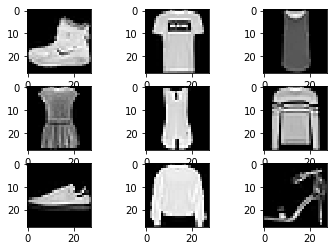

In [9]:
# Plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

## 1.b) Data Cleaning

In [10]:
# Not required for this iteration of the project

## 1.c) Feature Scaling and Pre-processing

In [11]:
# Apply feature scaling and transformation
X_train = X_train / 255.0
X_test = X_test / 255.0

## 1.d) Splitting Data into Training and Test Sets

In [12]:
# Encode class values as integers and perform one-hot-encoding
encoder = preprocessing.LabelEncoder()
encoder.fit(y_train)
train_transformed = encoder.transform(y_train)
test_transformed = encoder.transform(y_test)
y_train = tf.keras.utils.to_categorical(train_transformed)
y_test = tf.keras.utils.to_categorical(test_transformed)

print('Train Shape: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test Shape: X=%s, y=%s' % (X_test.shape, y_test.shape))

num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_train.shape[1]

Train Shape: X=(60000, 28, 28), y=(60000, 10)
Test Shape: X=(10000, 28, 28), y=(10000, 10)


In [13]:
if (notifyStatus): email_notify("Phase 1 Load Data completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 2. Define Model

In [14]:
if (notifyStatus): email_notify("Phase 2 Define Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [15]:
# Define the Keras model required for KerasClassifier
def create_default_model():
    default_model = Sequential()
    default_model.add(Flatten(input_shape=(28, 28)))
    default_model.add(Dense(num_pixels, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(num_classes, activation='softmax', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

In [16]:
# Define the Callback class and early-stopping function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [17]:
# Initialize the baseline model
baseline_model = create_default_model()

In [18]:
if (notifyStatus): email_notify("Phase 2 Define Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 3. Fit and Evaluate Model

In [19]:
if (notifyStatus): email_notify("Phase 3 Fit and Evaluate Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [20]:
startTimeModule = datetime.now()

baseline_hist = baseline_model.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch,
                                   validation_data=(X_test, y_test), verbose=1, callbacks=[callbacks])
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4850 - accuracy: 0.8298 - val_loss: 0.4096 - val_accuracy: 0.8551
Epoch 2/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3618 - accuracy: 0.8694 - val_loss: 0.3660 - val_accuracy: 0.8702
Epoch 3/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3204 - accuracy: 0.8829 - val_loss: 0.3527 - val_accuracy: 0.8709
Epoch 4/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2951 - accuracy: 0.8912 - val_loss: 0.3483 - val_accuracy: 0.8769
Epoch 5/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2796 - accuracy: 0.8965 - val_loss: 0.3327 - val_accuracy: 0.8786
Epoch 6/20
59300/60000 [============================>.] - ETA: 0s - loss: 0.2627 - accuracy: 0.9032
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 5s 83us/samp

In [21]:
# Display a summary of the baseline model
print(baseline_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# Display the configuration of the baseline model
print(baseline_model.get_config())

{'name': 'sequential', 'layers': [{'class_name': 'Flatten', 'config': {'name': 'flatten', 'trainable': True, 'batch_input_shape': (None, 28, 28), 'dtype': 'float32', 'data_format': 'channels_last'}}, {'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 784, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 10, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_

In [23]:
# List all data points in the baseline model training history
print(baseline_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


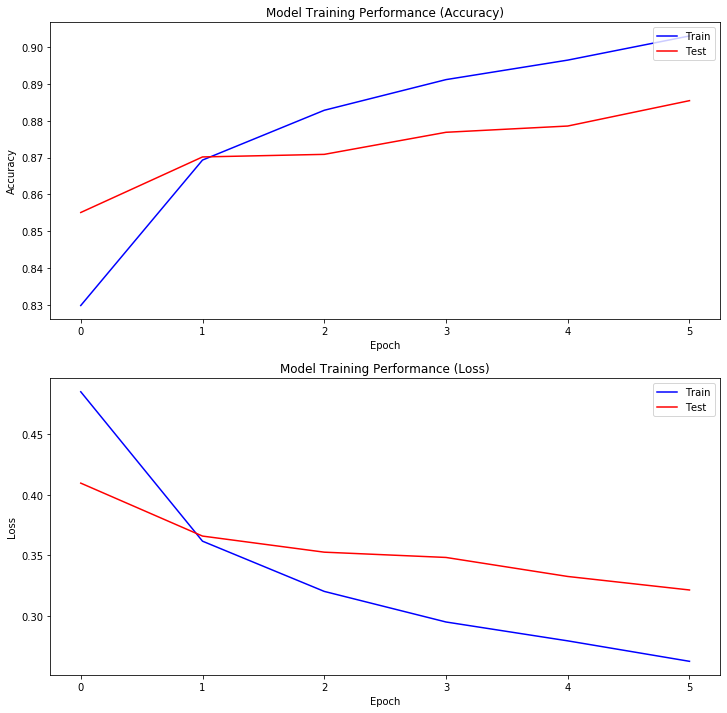

In [24]:
# Summarize model training hisotry for accuracy and loss
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(baseline_hist.history['accuracy'], color='blue', label='train')
plt.plot(baseline_hist.history['val_accuracy'], color='red', label='test')
plt.title('Model Training Performance (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.subplot(212)
plt.plot(baseline_hist.history['loss'], color='blue', label='train')
plt.plot(baseline_hist.history['val_loss'], color='red', label='test')
plt.title('Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [25]:
if (notifyStatus): email_notify("Phase 3 Fit and Evaluate Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 4. Optimize Model

In [26]:
if (notifyStatus): email_notify("Phase 4 Optimize Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [27]:
# Not applicable for this iteration of the project

In [28]:
if (notifyStatus): email_notify("Phase 4 Optimize Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 5. Finalize Model

In [29]:
if (notifyStatus): email_notify("Phase 5 Finalize Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [30]:
# Initialize the final model
final_model = create_default_model()

In [31]:
# Create the final model for evaluating the test dataset
best_epoch = 3
best_batch = default_batch
final_model.fit(X_train, y_train, epochs=best_epoch, batch_size=best_batch, verbose=1)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4837 - accuracy: 0.8317
Epoch 2/3
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3490 - accuracy: 0.8731
Epoch 3/3
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3147 - accuracy: 0.8848


In [32]:
# Display a summary of the final model
print(final_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
# Display the configuration of the final model
print(final_model.get_config())

{'name': 'sequential_1', 'layers': [{'class_name': 'Flatten', 'config': {'name': 'flatten_1', 'trainable': True, 'batch_input_shape': (None, 28, 28), 'dtype': 'float32', 'data_format': 'channels_last'}}, {'class_name': 'Dense', 'config': {'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'units': 784, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_3', 'trainable': True, 'dtype': 'float32', 'units': 10, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 

In [34]:
# Evaluate the Keras model on previously unseen data
scores = final_model.evaluate(X_test, y_test, verbose=0)
print("The model %s: %f%%" % (final_model.metrics_names[1], scores[1]*100))
print("The model %s: %f" % (final_model.metrics_names[0], scores[0]))

The model accuracy: 87.699997%
The model loss: 0.342190


In [35]:
# Make class predictions with the model
predictions = final_model.predict_classes(X_test)

# Summarize the first 20 cases
for i in range(20):
	print('Data item #%d predicted to be %s (expected %s)' % (i, encoder.inverse_transform([predictions[i]]), encoder.inverse_transform([np.argmax(y_test[i])])))

Data item #0 predicted to be [9] (expected [9])
Data item #1 predicted to be [2] (expected [2])
Data item #2 predicted to be [1] (expected [1])
Data item #3 predicted to be [1] (expected [1])
Data item #4 predicted to be [6] (expected [6])
Data item #5 predicted to be [1] (expected [1])
Data item #6 predicted to be [4] (expected [4])
Data item #7 predicted to be [6] (expected [6])
Data item #8 predicted to be [5] (expected [5])
Data item #9 predicted to be [7] (expected [7])
Data item #10 predicted to be [4] (expected [4])
Data item #11 predicted to be [5] (expected [5])
Data item #12 predicted to be [5] (expected [7])
Data item #13 predicted to be [3] (expected [3])
Data item #14 predicted to be [4] (expected [4])
Data item #15 predicted to be [1] (expected [1])
Data item #16 predicted to be [2] (expected [2])
Data item #17 predicted to be [2] (expected [4])
Data item #18 predicted to be [8] (expected [8])
Data item #19 predicted to be [0] (expected [0])


In [36]:
if (notifyStatus): email_notify("Phase 5 Finalize Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [37]:
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:00:57.878542
